<a href="https://colab.research.google.com/github/larayucebas/CS210-Project---Data-Dining/blob/main/Data_Dining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

      Name of the Place    Location        Type Special Item  \
0  MENDEL'S Chocolatier    Beşiktaş        Cafe    Chocolate   
1                Suflör    Beşiktaş        Cafe      Souffle   
2                  Jain  Arnavutköy         Bar     Coctails   
3            Kaen Sushi     Üsküdar  Restaurant        Sushi   
4            House of B    Beşiktaş  Restaurant    Hamburger   

  Google Rating (1-min, 5-max)  
0                          4.2  
1                          4.6  
2                          4.3  
3                          4.6  
4                          4.5  

Column Names:
Index(['Name of the Place', 'Location', 'Type', 'Special Item',
       'Google Rating (1-min, 5-max)'],
      dtype='object')

Summary Statistics:
       Name of the Place  Location        Type Special Item  \
count                228       228         228          145   
unique               226        14           3           27   
top                Akali  Beşiktaş  Restaurant    Hamburger   
fre

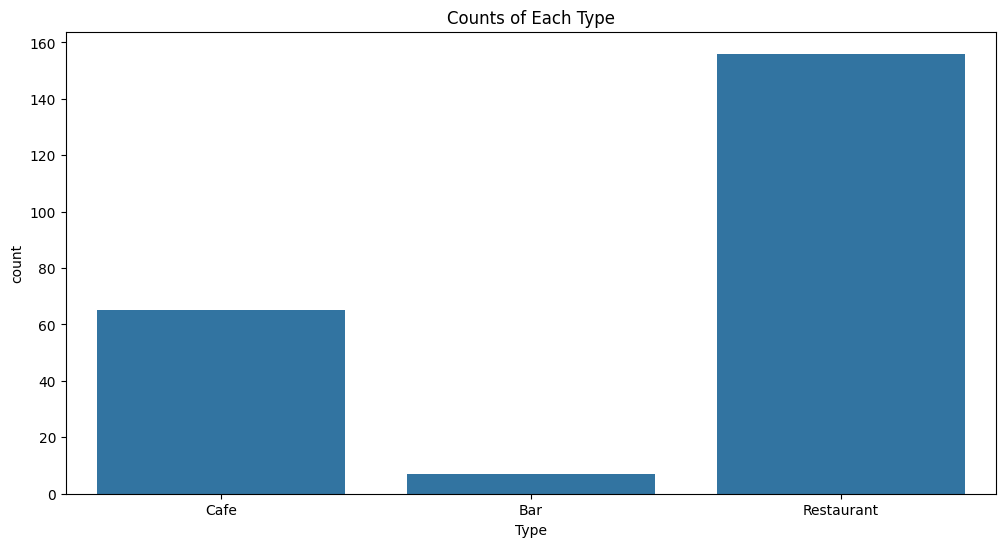

In [73]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


file_path = '/content/CS210 Project Data.xlsx'
df = pd.read_excel(file_path)


print(df.head())


print("\nColumn Names:")
print(df.columns)


print("\nSummary Statistics:")
print(df.describe())e


plt.figure(figsize=(12, 6))
sns.countplot(x='Type', data=df)
plt.title('Counts of Each Type')
plt.show()




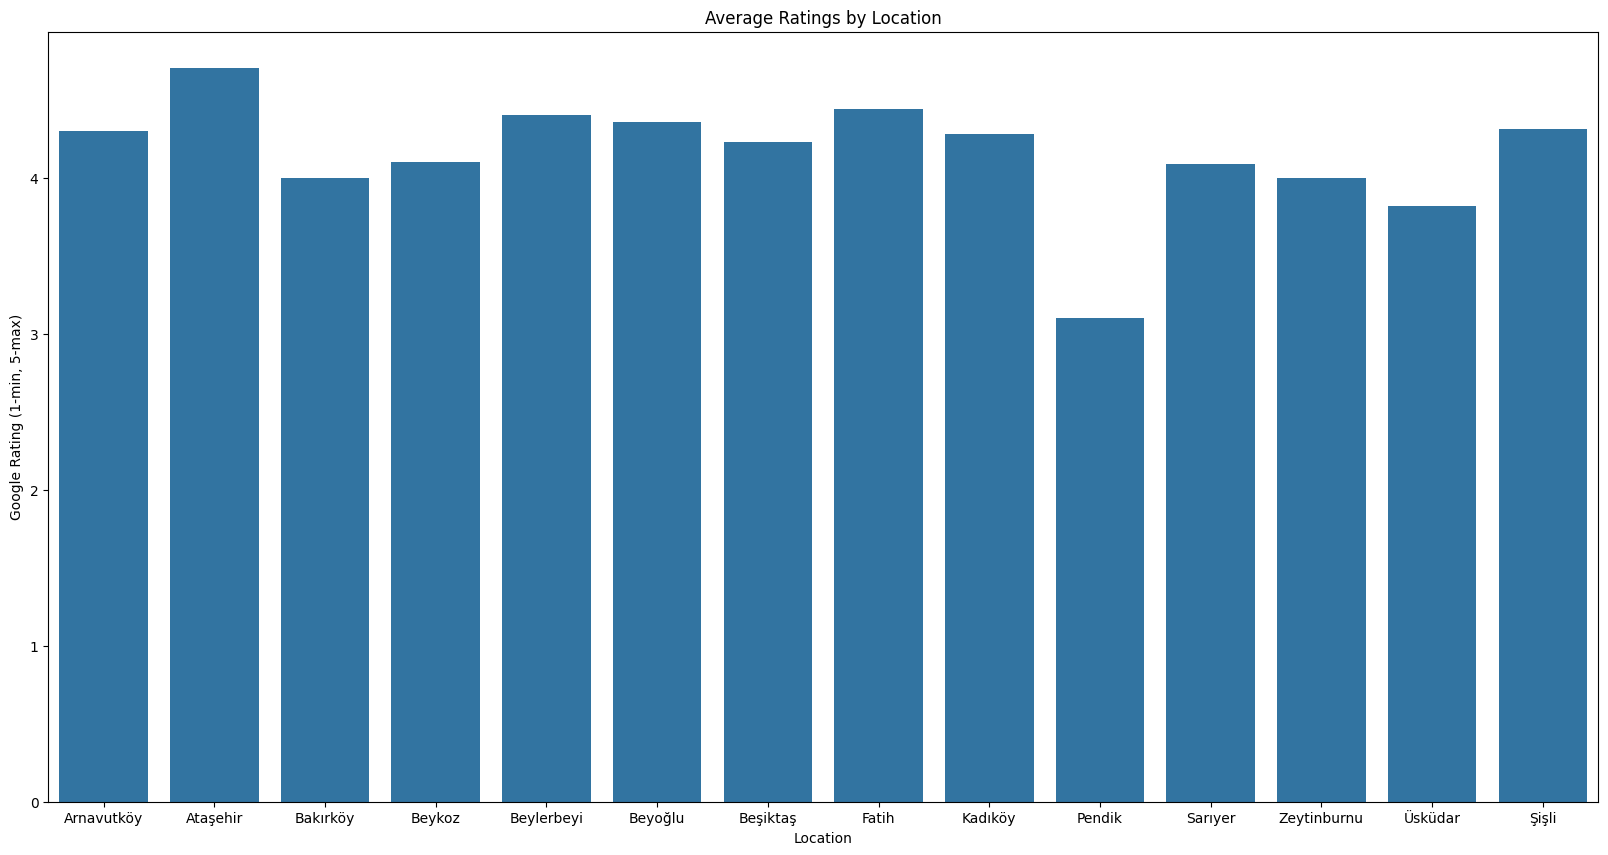

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = '/content/CS210 Project Data.xlsx'
df = pd.read_excel(file_path)


locations_column = 'Location'
ratings_column = 'Google Rating (1-min, 5-max)'


if locations_column in df.columns and ratings_column in df.columns:

    df[ratings_column] = pd.to_numeric(df[ratings_column], errors='coerce')


    df = df.dropna(subset=[ratings_column])

    average_ratings = df.groupby(locations_column)[ratings_column].mean().reset_index()


    plt.figure(figsize=(20, 10))
    sns.barplot(x=locations_column, y=ratings_column, data=average_ratings)
    plt.title('Average Ratings by Location')
    plt.show()



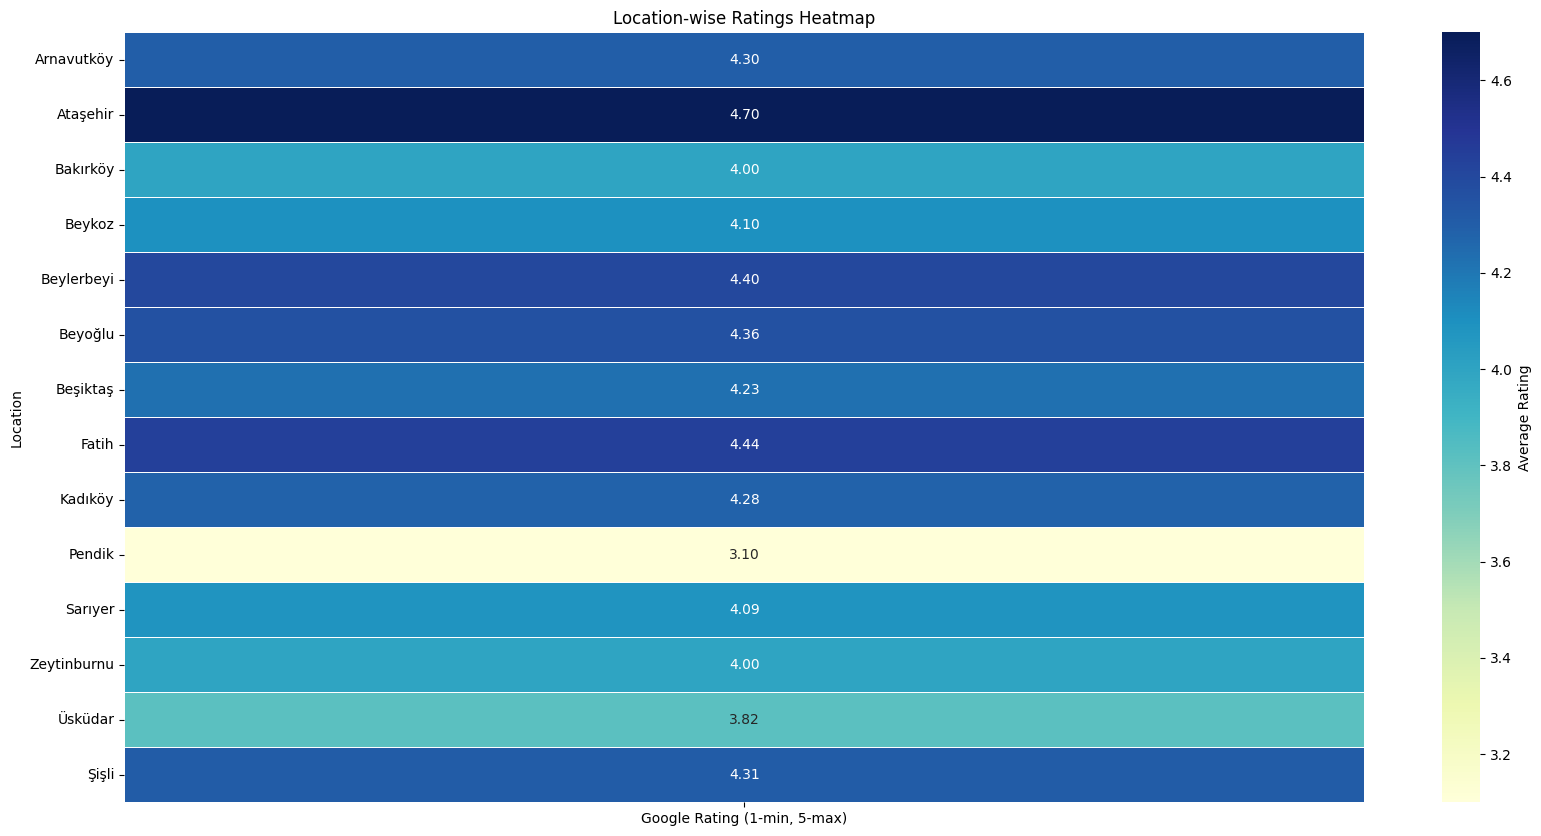

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = '/content/CS210 Project Data.xlsx'
df = pd.read_excel(file_path)


locations_column = 'Location'
ratings_column = 'Google Rating (1-min, 5-max)'


if locations_column in df.columns and ratings_column in df.columns:

    df[ratings_column] = pd.to_numeric(df[ratings_column], errors='coerce')


    df = df.dropna(subset=[ratings_column])


    average_ratings = df.groupby(locations_column)[ratings_column].mean().reset_index()


    plt.figure(figsize=(20, 10))
    heatmap_data = average_ratings.pivot_table(index=locations_column, values=ratings_column)
    sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=.5, cbar_kws={'label': 'Average Rating'})
    plt.title('Location-wise Ratings Heatmap')
    plt.show()


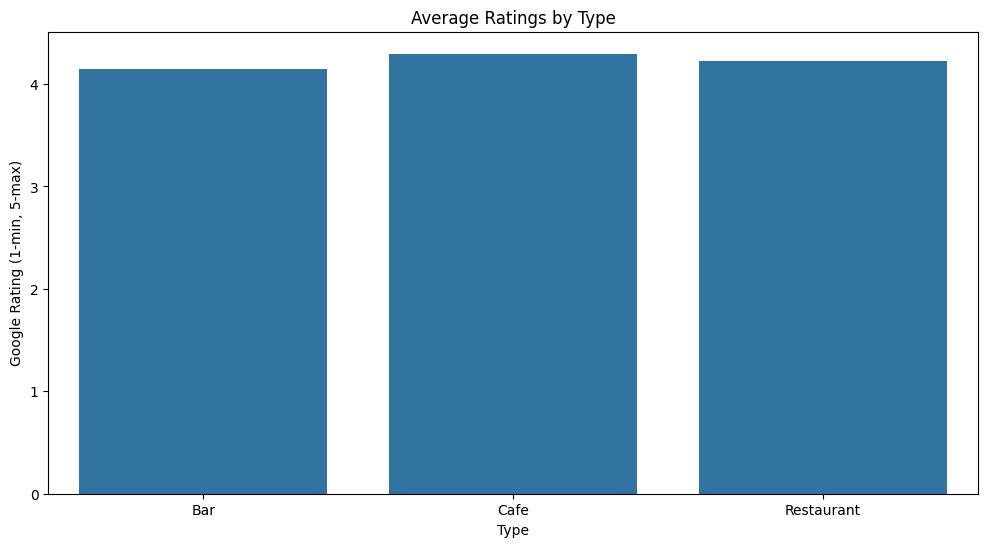

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


file_path = '/content/CS210 Project Data.xlsx'
df = pd.read_excel(file_path)


types_column = 'Type'
ratings_column = 'Google Rating (1-min, 5-max)'


if types_column in df.columns and ratings_column in df.columns:

    df[ratings_column] = pd.to_numeric(df[ratings_column], errors='coerce')


    df = df.dropna(subset=[ratings_column])


    average_ratings_by_type = df.groupby(types_column)[ratings_column].mean().reset_index()


    plt.figure(figsize=(12, 6))
    sns.barplot(x=types_column, y=ratings_column, data=average_ratings_by_type)
    plt.title('Average Ratings by Type')
    plt.show()
else:
    print(f"Columns not found in the dataset: {types_column}, {ratings_column}")


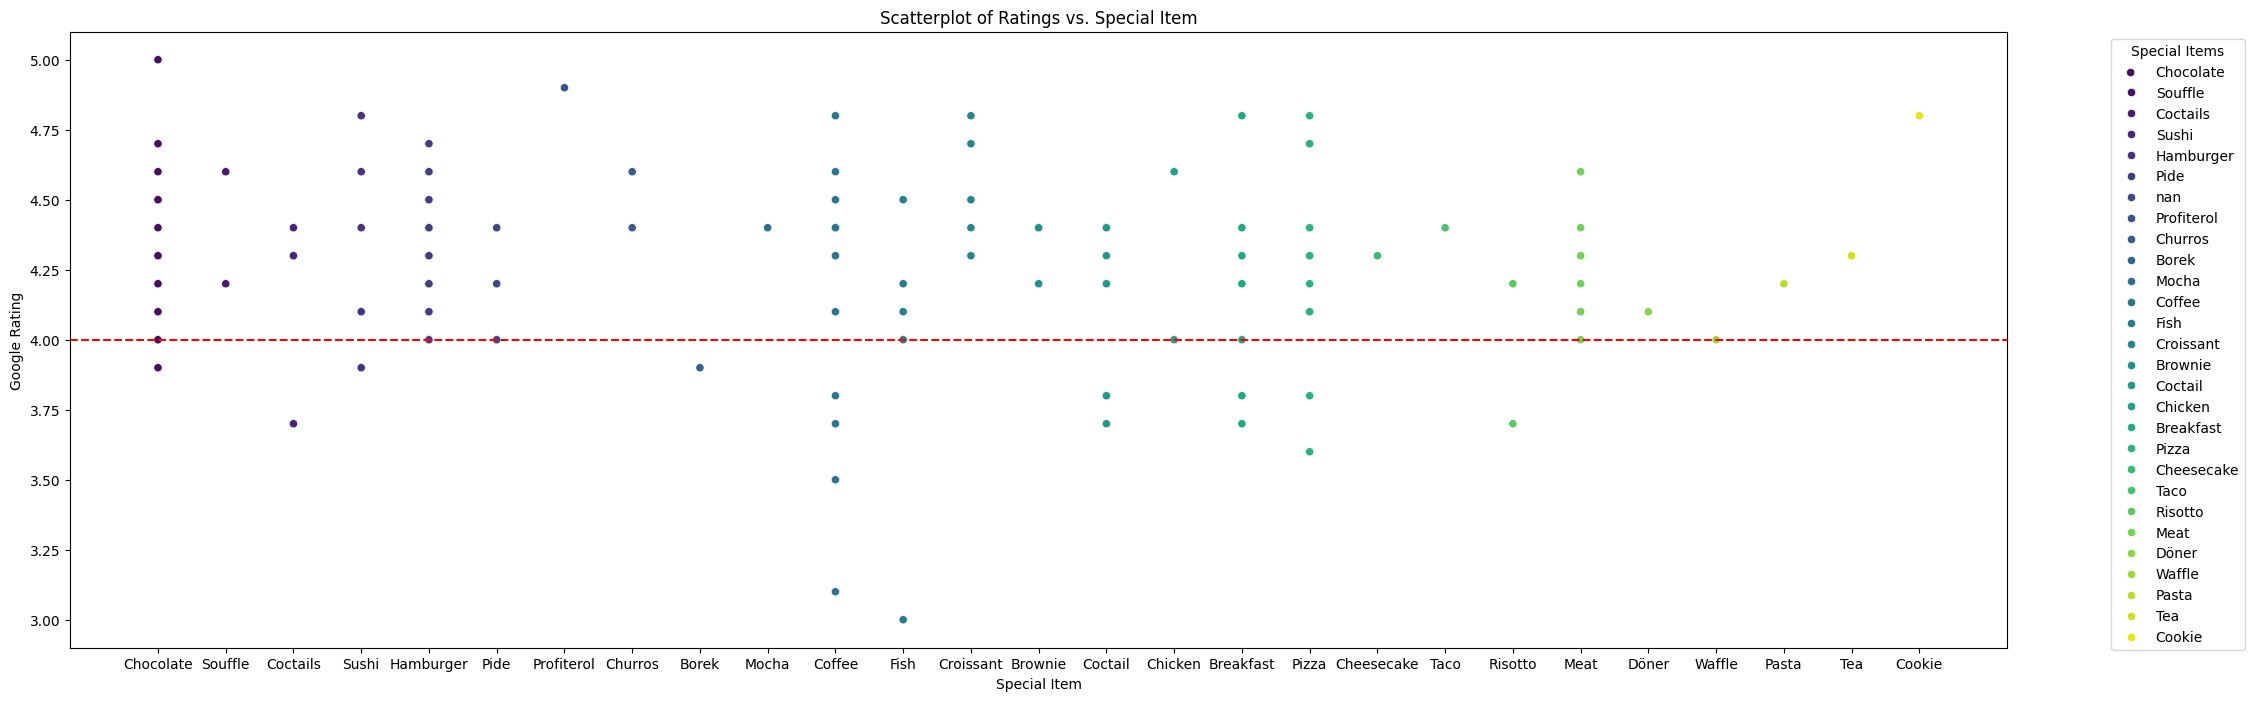

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = '/content/CS210 Project Data.xlsx'
df = pd.read_excel(file_path)


ratings_column = 'Google Rating (1-min, 5-max)'
special_item_column = 'Special Item'


if ratings_column in df.columns and special_item_column in df.columns:

    df[ratings_column] = pd.to_numeric(df[ratings_column], errors='coerce')

    df = df.dropna(subset=[ratings_column])

    special_items = df[special_item_column].unique()

    plt.figure(figsize=(25, 8))
    sns.scatterplot(x=special_item_column, y=ratings_column, data=df, hue=special_item_column, palette='viridis')


    plt.legend(title='Special Items', labels=special_items, bbox_to_anchor=(1.05, 1), loc='upper left')


    plt.axhline(y=4, color='red', linestyle='--', label='Rating = 4')

    plt.title('Scatterplot of Ratings vs. Special Item')
    plt.xlabel('Special Item')
    plt.ylabel('Google Rating')
    plt.show()


Machine Learning

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

file_path = '/content/CS210 Project Data.xlsx'
df = pd.read_excel(file_path)


ratings_column = 'Google Rating (1-min, 5-max)'


df[ratings_column] = pd.to_numeric(df[ratings_column], errors='coerce')


df = df.dropna(subset=[ratings_column])


label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder()


categorical_columns = df.select_dtypes(include=['object']).columns


for col in categorical_columns:

    df[col] = label_encoder.fit_transform(df[col])

    one_hot_encoded = one_hot_encoder.fit_transform(df[[col]]).toarray()
    one_hot_df = pd.DataFrame(one_hot_encoded, columns=[f"{col}_{int(val)}" for val in one_hot_encoder.categories_[0]])


    df = pd.concat([df, one_hot_df], axis=1)


    df = df.drop(columns=[col])


imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


train_data, test_data = train_test_split(df_imputed, test_size=0.2, random_state=42)


model = GradientBoostingRegressor(random_state=42)


model.fit(train_data.drop(columns=[ratings_column]), train_data[ratings_column])


predictions = model.predict(test_data.drop(columns=[ratings_column]))


mse = mean_squared_error(test_data[ratings_column], predictions)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.09955226676568261


In [98]:
import pandas as pd
from scipy.stats import ttest_rel

file_path = '/content/CS210 Project Data.xlsx'
df = pd.read_excel(file_path)

rating_column = 'Google Rating (1-min, 5-max)'


df[rating_column] = pd.to_numeric(df[rating_column], errors='coerce')


df = df.dropna(subset=[rating_column])


at_least_4_rating = df[df[rating_column] >= 4.0][rating_column]
below_4_rating = df[df[rating_column] < 4.0][rating_column]


min_len = min(len(at_least_4_rating), len(below_4_rating))
at_least_4_rating = at_least_4_rating[:min_len]
below_4_rating = below_4_rating[:min_len]


t_stat, p_value = ttest_rel(at_least_4_rating, below_4_rating)

alpha = 0.05

if p_value < alpha:
    print("Fail to reject the Null Hypothesis. Some places in Istanbul, including bars, restaurants, and cafes, have a Google rating of at least 4.0 overall.")
else:
    print("Reject the Null Hypothesis. There is significant evidence that some places in Istanbul, including bars, restaurants, and cafes, do not have a Google rating of at least 4.0 overall.")


Fail to reject the Null Hypothesis. Some places in Istanbul, including bars, restaurants, and cafes, have a Google rating of at least 4.0 overall.
